# Sheet 9

In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.optim import Adam, SGD
from torch.utils.data import TensorDataset, DataLoader
import torchvision

## 1 Jet-Tagging with PyTorch
(a)

In [2]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy').T
labels = np.load('data/dijet_labels.npy')

# shuffle the data
order = np.arange(len(labels))
np.random.seed(0)
np.random.shuffle(order)
features = features[order]
labels = labels[order]

n_features = features.shape[1]
print(n_features)
print(f'{features.shape=}, {labels.shape=}')

# # TODO: create train, val and test splits
ind_train = order[400:]
ind_test = order[200:400]
ind_val = order[0:200]

train,train_l = features[ind_train],labels[ind_train]
test,test_l = features[ind_test],labels[ind_test]
val,val_l = features[ind_val],labels[ind_val]

# # TODO: create the datsets

training_data = torch.utils.data.TensorDataset(torch.from_numpy(train).to(torch.float32), torch.from_numpy(train_l).to(torch.float32))
test_data = torch.utils.data.TensorDataset(torch.from_numpy(test).to(torch.float32),torch.from_numpy(test_l).to(torch.float32))
val_data = torch.utils.data.TensorDataset(torch.from_numpy(val).to(torch.float32),torch.from_numpy(val_l).to(torch.float32))

116
features.shape=(2233, 116), labels.shape=(2233,)


(b)

In [3]:
# TODO: Instantiate an MLP as specified
mlp_model = torchvision.ops.MLP(in_channels=n_features,hidden_channels=[128,128,128,128,3]
#activaton_layer = torch.nn.modules.activation.ReLU
)

mlp_model

MLP(
  (0): Linear(in_features=116, out_features=128, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.0, inplace=True)
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.0, inplace=True)
  (6): Linear(in_features=128, out_features=128, bias=True)
  (7): ReLU(inplace=True)
  (8): Dropout(p=0.0, inplace=True)
  (9): Linear(in_features=128, out_features=128, bias=True)
  (10): ReLU(inplace=True)
  (11): Dropout(p=0.0, inplace=True)
  (12): Linear(in_features=128, out_features=3, bias=True)
  (13): Dropout(p=0.0, inplace=True)
)

(c)

In [4]:
# TODO: create the optimizer
optimizer = Adam(mlp_model.parameters(), lr=1e-4)

# TODO: create the criterion
criterion = torch.nn.CrossEntropyLoss()

(d)

Text(0.5, 0.98, 'Categorical Plotting')

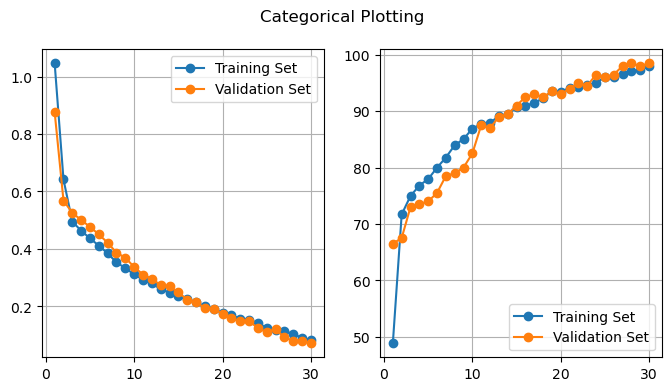

In [5]:
# TODO: create the data loaders, use a batch size of 16
train_loader = DataLoader(training_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

# TODO: Implement the training loop, validating after every epoch and keeping track of losses and accuracies
loss_train = []
loss_val = []
acc_train = []
acc_val = []

for epoch in range(30):
    running_loss1,running_loss2 = 0.0,0.0
    running_accuracy1,running_accuracy2 = 0.0,0.0
    total1,total2 = 0,0
    for i, (x, y) in enumerate(train_loader):
        #TODO: train step
        inputs1,labels1 = x,y

        # zero the parameter gradients
        optimizer.zero_grad()
        

        # forward + backward + optimize
        outputs1 = mlp_model(inputs1)
        loss1 = criterion(outputs1.to(torch.float64), labels1.to(torch.long))
        loss1.backward()
        optimizer.step()


        #statistics
        total1 += labels1.size(0)
        _, predicted1 = torch.max(outputs1, 1)
        running_loss1 += loss1.item()
        running_accuracy1 += (predicted1==labels1).sum().item()


    loss_train.append(running_loss1 / len(train_loader))
    acc_train.append(100 * running_accuracy1/ total1) 



    # TODO: validate
    for i, (j, k) in enumerate(val_loader):
        #TODO: train step
        inputs2,labels2 = j,k

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs2 = mlp_model(inputs2)
        loss2 = criterion(outputs2.to(torch.float64), labels2.to(torch.long))
        loss2.backward()
        optimizer.step()

        #statistics
        total2 += labels2.size(0)
        _, predicted2 = torch.max(outputs2, 1)
        running_loss2 += loss2.item()
        running_accuracy2 += (predicted2==labels2).sum().item()
        

    loss_val.append(running_loss2 / len(val_loader))
    acc_val.append(100 * running_accuracy2/ total2) 

            
# TODO: Plot the losses and accuracies.
epoch =np.arange(1,31)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(epoch, loss_train, '-o',label="Training Set")
axs[0].plot(epoch, loss_val, '-o', label='Validation Set')
axs[0].legend()
axs[0].grid()
axs[1].plot(epoch, acc_train, '-o',label="Training Set")
axs[1].plot(epoch, acc_val, '-o', label='Validation Set')
axs[1].legend()
axs[1].grid()
fig.suptitle('Categorical Plotting')

In [152]:
labels1

tensor([0., 0., 1., 0., 0., 1., 2., 1., 0.])

Text(0.5, 0.98, 'Categorical Plotting')

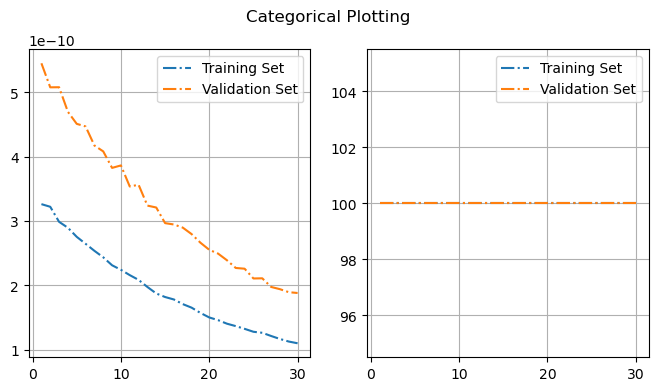

In [153]:
epoch =np.arange(1,31)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(epoch, loss_train, '-.',label="Training Set")
axs[0].plot(epoch, loss_val, '-.', label='Validation Set')
axs[0].legend()
axs[0].grid()
axs[1].plot(epoch, acc_train, '-.',label="Training Set")
axs[1].plot(epoch, acc_val, '-.', label='Validation Set')
axs[1].legend()
axs[1].grid()
fig.suptitle('Categorical Plotting')

In [80]:
s=0
a=[1,2,3,4]
b=[1,2,3,5]
s += (a==b).sum()

AttributeError: 'bool' object has no attribute 'sum'

(e)

In [ ]:
# TODO: load the best model and evaluate it on the test set


(f)

In [ ]:
# TODO: experiment with some hyperparameters and discuss your results


## Task 2: CNNs for Galaxy Classification

Read through and run the cells below to get started

In [ ]:
# download the data 
# it's ~200MB, might take some time depending on your internet speed

import urllib.request
_, msg = urllib.request.urlretrieve(
    "http://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5", 
    "data/Galaxy10.h5"
)

In [ ]:
import h5py
import numpy as np
import torch

label_names = [
    'Disk, Face-on, No Spiral',
    'Smooth, Completely round',
    'Smooth, in-between round',
    'Smooth, Cigar shaped',
    'Disk, Edge-on, Rounded Bulge',
    'Disk, Edge-on, Boxy Bulge',
    'Disk, Edge-on, No Bulge',
    'Disk, Face-on, Tight Spiral',
    'Disk, Face-on, Medium Spiral',
    'Disk, Face-on, Loose Spiral'
]
n_classes = len(label_names)

# To get the images and labels from file
with h5py.File('data/Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
with h5py.File('data/Galaxy10_compressed.h5', 'w') as f:
    f.create_dataset('images', data=images.astype(np.float16), compression='gzip')
    f.create_dataset('ans', data=labels.astype(np.int32), compression='gzip')
    
images = images.astype(np.float32)

# comply to (batch, channel, height, width) convention of pytorch
images = np.moveaxis(images, -1, 1)  
# convert to torch
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

print(f'{images.shape=}, {labels.shape=}')

print(labels.shape, images.shape)
print(f'\nNumber of samples per class:')
for label, count in zip(*np.unique(labels, return_counts=True)):
    print(f'{label_names[label]:40s}: {count}')

In [ ]:
from matplotlib import pyplot as plt

# plot some samples of each class
itemindex = torch.where(labels == 3)
itemindex[:3]

samples_per_class = 3
fig, axss = plt.subplots(samples_per_class, n_classes, figsize=(n_classes * 2, samples_per_class * 2))
for label, (label_name, axs) in enumerate(zip(label_names, axss.T)):
    idx = torch.where(labels==label)[0][:samples_per_class] # take samples_per_class first occurences
    for i, (ind, ax) in enumerate(zip(idx, axs)):
        ax.imshow(images[ind].long().moveaxis(0, -1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title(label_name.replace(',',',\n'))
plt.tight_layout()
plt.show()

In [ ]:
from torchvision.transforms import Normalize

# Compute the mean and standard deviation per channel over the dataset
# stds = images.moveaxis(1, 0).reshape(3, -1).std(axis=1)
# means = images.moveaxis(1, 0).reshape(3, -1).mean(axis=1)

# Use precomputed means and stds
stds, means = torch.tensor([37.5412, 31.3756, 26.3283]), torch.tensor([27.7014, 23.8241, 18.1425])

# TODO: Normalize the images
normalize = Normalize(means, stds)
images_normalized = normalize(images)

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

n_samples = len(labels)

# split the data in training and validation sets, stratifying by the labels
train_idx, val_idx = train_test_split(np.arange(n_samples), test_size=0.1, stratify=labels)

# create pytorch datasets for training and validation
train_dataset = TensorDataset(images_normalized[train_idx].float(), labels[train_idx].long())
val_dataset = TensorDataset(images_normalized[val_idx].float(), labels[val_idx].long())

(a)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#TODO: implement a small CNN as specified on the sheet


(b)

In [ ]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion

# TODO: implement the training loop, validating after every epoch, and make the requested plots


(c)

In [ ]:
# TODO: redo (c) with a ResNet
# Hint: Training is probably quicker on google colab (https://colab.research.google.com/)

